In [404]:

# Dependencies and Setup
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

# File to Load (Remember to Change These)
country_sugar_consumption_file= "Resources/sugar_consumption.csv"
country_healthexpend_file = "Resources/healthexpend.csv"
country_gdp_file= "Resources/gdp.csv"
country_badteeth_file = "Resources/badteeth.csv"

# Read School and Student Data File and store into Pandas DataFrames
country_sugar_consumption_data = pd.read_csv(country_sugar_consumption_file)
country_healthexpend_data = pd.read_csv(country_healthexpend_file)
country_gdp_data = pd.read_csv(country_gdp_file)
country_badteeth_data = pd.read_csv(country_badteeth_file)

country_sugar_consumption_data = country_sugar_consumption_data.replace(',','', regex=True)

country_healthexpend_data = country_healthexpend_data.replace(',','', regex=True)

country_gdp_data = country_gdp_data.replace(',','', regex=True)

country_badteeth_data = country_badteeth_data.replace(',','', regex=True)

#country_sugar_consumption_data.head()

#country_healthexpend_data.head()

country_gdp_data[0:20]

#country_badteeth_data.head()
#country_sugar_consumption_data = country_sugar_consumption_data.dropna()
#country_test = country_sugar_consumption_data.sort_values(by=['X2004'])
#country_test = country_sugar_consumption_data.sort_values(by='X2004', ascending=False)
#country_test[0:20]


,Income.per.person..fixed.2000.US..,X1960,X1961,X1962,X1963,X1964,X1965,X1966,X1967,X1968,...,X2002,X2003,X2004,X2005,X2006,X2007,X2008,X2009,X2010,X2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1313.722725,1381.040832,1454.022854,1525.723589,1594.495067,1681.613910,1804.419415,1857.352947,1915.424459,1965.707230
4,Algeria,1280.384828,1085.414612,855.947986,1128.415780,1170.323896,1215.015783,1127.614288,1200.558225,1291.863983,...,1871.921986,1971.512803,2043.135713,2115.186028,2124.957754,2155.485231,2173.787903,2192.703976,2231.980246,2255.225482
5,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19430.054781,19834.632624,20254.346287,20737.945117,21595.395482,21495.805083,21943.339898,NaN,NaN,NaN
7,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,329.565594,328.777995,353.231466,404.270302,473.136344,562.987685,622.566879,619.818580,623.245275,629.955306
8,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9753.308311,10241.684839,10599.284668,11102.932157,12452.282038,13495.127466,13352.168544,11645.634909,10614.794315,9977.957073


In [238]:
country_SC_cleaned = country_sugar_consumption_data[(country_sugar_consumption_data['NA.'] == 'United States') | 
                                                     (country_sugar_consumption_data['NA.'] == 'Canada') |
                                                     (country_sugar_consumption_data['NA.'] == 'Brazil') |
                                                     (country_sugar_consumption_data['NA.'] == 'China') |
                                                     (country_sugar_consumption_data['NA.'] == 'Russia') ]

country_SC_cleaned.reset_index(drop=True, inplace=True)
# US, Canada, Brazil, China, Russia
country_SC_cleaned = pd.DataFrame({ "Country": country_SC_cleaned["NA."],
                                    "1996": country_SC_cleaned["X1996"],
                                    "1997": country_SC_cleaned["X1997"],
                                    "1998": country_SC_cleaned["X1998"],
                                    "1999": country_SC_cleaned["X1999"],
                                    "2000": country_SC_cleaned["X2000"],
                                    "2001": country_SC_cleaned["X2001"],
                                    "2002": country_SC_cleaned["X2002"],
                                    "2003": country_SC_cleaned["X2003"],
                                    "2004": country_SC_cleaned["X2004"]})

country_SC_cleaned = country_SC_cleaned.sort_values(by=['Country'], ascending=False)

country_SC_cleaned.reset_index(drop=True, inplace=True)

#country_SC_cleaned.drop(["Country"], axis=1)

#country_SC_cleaned

# NEW STUFF
country_SC_cleaned = country_SC_cleaned.transpose()
country_SC_cleaned.columns = ["United States", "Russia", "China", "Canada", "Brazil"]
country_SC_cleaned = country_SC_cleaned.drop(["Country"])
country_SC_cleaned

,United States,Russia,China,Canada,Brazil
1996,186.3,101.37,21.92,134.25,153.43
1997,194.52,101.37,24.66,139.73,156.16
1998,194.52,106.85,21.92,142.47,156.16
1999,189.04,109.59,19.18,139.73,153.43
2000,194.52,112.33,16.44,145.21,153.43
2001,194.52,117.81,16.44,153.43,156.16
2002,194.52,120.55,19.18,167.12,150.69
2003,191.78,120.55,21.92,172.6,153.43
2004,191.78,120.55,21.92,172.6,153.43


In [262]:
country_HE_cleaned = country_healthexpend_data[(country_healthexpend_data['Per.capita.government.expenditure.on.health.at.average.exchange.rate..US..'] == 'United States') | 
                                               (country_healthexpend_data['Per.capita.government.expenditure.on.health.at.average.exchange.rate..US..'] == 'Canada') |
                                               (country_healthexpend_data['Per.capita.government.expenditure.on.health.at.average.exchange.rate..US..'] == 'Brazil') |
                                               (country_healthexpend_data['Per.capita.government.expenditure.on.health.at.average.exchange.rate..US..'] == 'China') |
                                               (country_healthexpend_data['Per.capita.government.expenditure.on.health.at.average.exchange.rate..US..'] == 'Russia') ]

country_HE_cleaned.reset_index(drop=True, inplace=True)

country_HE_cleaned = pd.DataFrame({"Country": country_HE_cleaned['Per.capita.government.expenditure.on.health.at.average.exchange.rate..US..'],
                                    "1996": country_HE_cleaned["X1996"],
                                    "1997": country_HE_cleaned["X1997"],
                                    "1998": country_HE_cleaned["X1998"],
                                    "1999": country_HE_cleaned["X1999"],
                                    "2000": country_HE_cleaned["X2000"],
                                    "2001": country_HE_cleaned["X2001"],
                                    "2002": country_HE_cleaned["X2002"],
                                    "2003": country_HE_cleaned["X2003"],
                                    "2004": country_HE_cleaned["X2004"],
                                    "2005": country_HE_cleaned["X2005"],
                                    "2006": country_HE_cleaned["X2006"],
                                    "2007": country_HE_cleaned["X2007"],
                                    "2008": country_HE_cleaned["X2008"],
                                    "2009": country_HE_cleaned["X2009"],
                                    "2010": country_HE_cleaned["X2010"]})

#country_HE_cleaned = country_HE_cleaned.replace(',','', regex=True)

# country_HE_cleaned["1996"] = country_HE_cleaned["1996"].map("{:,.2f}".format)
# country_HE_cleaned["1997"] = country_HE_cleaned["1997"].map("{:,.2f}".format)
# country_HE_cleaned["1998"] = country_HE_cleaned["1998"].map("{:,.2f}".format)
# country_HE_cleaned["1999"] = country_HE_cleaned["1999"].map("{:,.2f}".format)
# country_HE_cleaned["2000"] = country_HE_cleaned["2000"].map("{:,.2f}".format)
# country_HE_cleaned["2001"] = country_HE_cleaned["2001"].map("{:,.2f}".format)
# country_HE_cleaned["2002"] = country_HE_cleaned["2002"].map("{:,.2f}".format)
# country_HE_cleaned["2003"] = country_HE_cleaned["2003"].map("{:,.2f}".format)
# country_HE_cleaned["2004"] = country_HE_cleaned["2004"].map("{:,.2f}".format)
# country_HE_cleaned["2005"] = country_HE_cleaned["2005"].map("{:,.2f}".format)
# country_HE_cleaned["2006"] = country_HE_cleaned["2006"].map("{:,.2f}".format)
# country_HE_cleaned["2007"] = country_HE_cleaned["2007"].map("{:,.2f}".format)
# country_HE_cleaned["2008"] = country_HE_cleaned["2008"].map("{:,.2f}".format)
# country_HE_cleaned["2009"] = country_HE_cleaned["2009"].map("{:,.2f}".format)
# country_HE_cleaned["2010"] = country_HE_cleaned["2010"].map("{:,.2f}".format)

country_HE_cleaned = country_HE_cleaned.replace(',','', regex=True)

country_HE_cleaned = country_HE_cleaned.sort_values(by=["Country"], ascending=False)

country_HE_cleaned.reset_index(drop=True, inplace=True)

#country_HE_cleaned

# NEW STUFF
country_HE_cleaned = country_HE_cleaned.transpose()
country_HE_cleaned.columns = ["United States", "Russia", "China", "Canada", "Brazil"]
country_HE_cleaned = country_HE_cleaned.drop(["Country"])
country_HE_cleaned

,United States,Russia,China,Canada,Brazil
1996,1753.84,104.731,12.316,1294.37,141.871
1997,1811.23,137.398,13.7073,1313.38,152.675
1998,1843.06,79.0182,14.7922,1304.44,143.058
1999,1916.39,47.6901,15.7836,1354.96,103.402
2000,2031.77,57.4589,16.6173,1469.88,106.754
2001,2231.18,69.8282,16.8067,1503.86,96.3013
2002,2404.82,83.7385,19.3833,1563.68,90.6629
2003,2608.07,97.9834,22.155,1878.22,94.7718
2004,2785.6,126.575,26.6266,2132.4,121.044
2005,2953.58,171.586,31.1591,2425.79,155.552


In [267]:
# US, Canada, Brazil, China, Russia
country_gdp_cleaned = country_gdp_data[(country_gdp_data['Income.per.person..fixed.2000.US..'] == 'United States') | 
                                       (country_gdp_data['Income.per.person..fixed.2000.US..'] == 'Canada') |
                                       (country_gdp_data['Income.per.person..fixed.2000.US..'] == 'Brazil') |
                                       (country_gdp_data['Income.per.person..fixed.2000.US..'] == 'China') |
                                       (country_gdp_data['Income.per.person..fixed.2000.US..'] == 'Russia')]

country_gdp_cleaned.reset_index(drop=True, inplace=True)

country_gdp_cleaned = pd.DataFrame({"Country": country_gdp_cleaned['Income.per.person..fixed.2000.US..'],
                                    "1996": country_gdp_cleaned["X1996"],
                                    "1997": country_gdp_cleaned["X1997"],
                                    "1998": country_gdp_cleaned["X1998"],
                                    "1999": country_gdp_cleaned["X1999"],
                                    "2000": country_gdp_cleaned["X2000"],
                                    "2001": country_gdp_cleaned["X2001"],
                                    "2002": country_gdp_cleaned["X2002"],
                                    "2003": country_gdp_cleaned["X2003"],
                                    "2004": country_gdp_cleaned["X2004"],
                                    "2005": country_gdp_cleaned["X2005"],
                                    "2006": country_gdp_cleaned["X2006"],
                                    "2007": country_gdp_cleaned["X2007"],
                                    "2008": country_gdp_cleaned["X2008"],
                                    "2009": country_gdp_cleaned["X2009"],
                                    "2010": country_gdp_cleaned["X2010"],
                                    "2011": country_gdp_cleaned["X2011"]})

# country_gdp_cleaned["1996"] = country_gdp_cleaned["1996"].map("{:,.2f}".format)
# country_gdp_cleaned["1997"] = country_gdp_cleaned["1997"].map("{:,.2f}".format)
# country_gdp_cleaned["1998"] = country_gdp_cleaned["1998"].map("{:,.2f}".format)
# country_gdp_cleaned["1999"] = country_gdp_cleaned["1999"].map("{:,.2f}".format)
# country_gdp_cleaned["2000"] = country_gdp_cleaned["2000"].map("{:,.2f}".format)
# country_gdp_cleaned["2001"] = country_gdp_cleaned["2001"].map("{:,.2f}".format)
# country_gdp_cleaned["2002"] = country_gdp_cleaned["2002"].map("{:,.2f}".format)
# country_gdp_cleaned["2003"] = country_gdp_cleaned["2003"].map("{:,.2f}".format)
# country_gdp_cleaned["2004"] = country_gdp_cleaned["2004"].map("{:,.2f}".format)
# country_gdp_cleaned["2005"] = country_gdp_cleaned["2005"].map("{:,.2f}".format)
# country_gdp_cleaned["2006"] = country_gdp_cleaned["2006"].map("{:,.2f}".format)
# country_gdp_cleaned["2007"] = country_gdp_cleaned["2007"].map("{:,.2f}".format)
# country_gdp_cleaned["2008"] = country_gdp_cleaned["2008"].map("{:,.2f}".format)
# country_gdp_cleaned["2009"] = country_gdp_cleaned["2009"].map("{:,.2f}".format)
# country_gdp_cleaned["2010"] = country_gdp_cleaned["2010"].map("{:,.2f}".format)
# country_gdp_cleaned["2011"] = country_gdp_cleaned["2011"].map("{:,.2f}".format)

country_gdp_cleaned = country_gdp_cleaned.replace(',','', regex=True)

country_gdp_cleaned = country_gdp_cleaned.sort_values(by='Country', ascending=False)

country_gdp_cleaned.reset_index(drop=True, inplace=True)

#country_gdp_cleaned

# NEW STUFF
country_gdp_cleaned = country_gdp_cleaned.transpose()
country_gdp_cleaned.columns = ["United States", "Russia", "China", "Canada", "Brazil"]
country_gdp_cleaned = country_gdp_cleaned.drop(["Country"])
country_gdp_cleaned

,United States,Russia,China,Canada,Brazil
1996,30828,1564.12,716.245,20276.5,3627.63
1997,31831.5,1590.7,774.885,20911.1,3693.28
1998,32847.4,1510.54,827.349,21580.3,3639.18
1999,34053.4,1613.7,882.552,22586.4,3594.87
2000,35081.9,1775.14,949.178,23559.5,3696.15
2001,35116.2,1870.05,1020.52,23738.9,3692.84
2002,35427.9,1967.52,1105.95,24214.9,3739.92
2003,36021.3,2121.29,1208.99,24425.9,3733.99
2004,36931.4,2285.36,1323.22,24936.8,3899.26
2005,37718,2442.96,1464.11,25437.7,3976.62


In [272]:
country_badteeth_cleaned = country_badteeth_data[(country_badteeth_data['NA.'] == 'United States') | 
                                       (country_badteeth_data['NA.'] == 'Canada') |
                                       (country_badteeth_data['NA.'] == 'Brazil') |
                                       (country_badteeth_data['NA.'] == 'China') |
                                       (country_badteeth_data['NA.'] == 'Russia')]



country_badteeth_cleaned = pd.DataFrame({"Country": country_badteeth_cleaned['NA.'],
                                         "2004": country_badteeth_cleaned["X2004"]})

country_badteeth_cleaned = country_badteeth_cleaned.sort_values(by='Country', ascending=False)

country_badteeth_cleaned.reset_index(drop=True, inplace=True)

#country_badteeth_cleaned
# NEW STUFF
country_badteeth_cleaned = country_badteeth_cleaned.transpose()
country_badteeth_cleaned.columns = ["United States", "Russia", "China", "Canada", "Brazil"]
country_badteeth_cleaned = country_badteeth_cleaned.drop(["Country"])
country_badteeth_cleaned

,United States,Russia,China,Canada,Brazil
2004,1.19,2.9,1.03,2.1,2.8


Text(0, 0.5, 'Decayed, Missing, and Filled teeth (DMFT)')

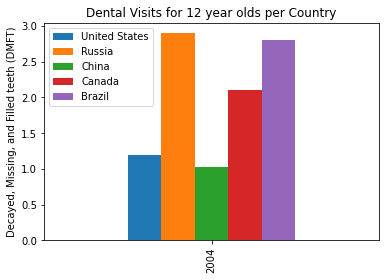

In [369]:
#Average of the number of Decayed (D), Missing (M), Filled (F) teeth (T) among the 12 years old in a country
dental_health_df = country_badteeth_cleaned

#ax = dental_health_df.plot.bar(x='Country', y='2004', rot=90, title="Avg Oral Issues for 12 year olds per Country")

#ax.set_ylabel('Decayed (D), Missing (M), Filled (F) teeth (T)')

ax = dental_health_df.plot.bar(y = ["United States", "Russia", "China", "Canada", "Brazil"], rot=90, title="Dental Visits for 12 year olds per Country")

ax.set_ylabel('Decayed, Missing, and Filled teeth (DMFT)')

Text(0, 0.5, 'grams per person a day')

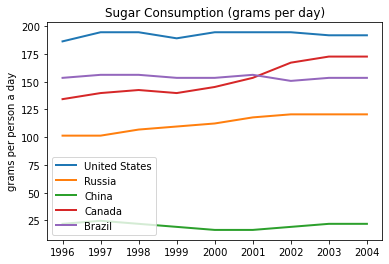

In [251]:
country_SC_copy = country_SC_cleaned
sugar_consump_lineg = country_SC_copy.plot.line(y = ["United States", "Russia", "China", "Canada", "Brazil"], title="Sugar Consumption (grams per day)", linewidth=2.0)
sugar_consump_lineg.set_ylabel('grams per person a day')

Text(0, 0.5, 'Annual amount per person($)')

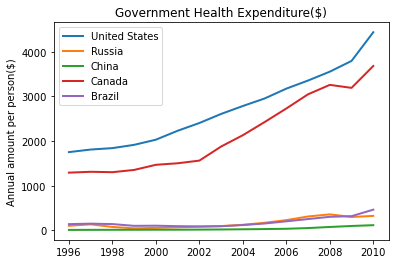

In [270]:
country_HE_copy = country_HE_cleaned
health_index_lineg = country_HE_copy.plot.line(y = ["United States", "Russia", "China", "Canada", "Brazil"], title="Government Health Expenditure($)", linewidth=2.0)
health_index_lineg.set_ylabel('Annual amount per person($)')

Text(0, 0.5, 'Annual gdp per person($)')

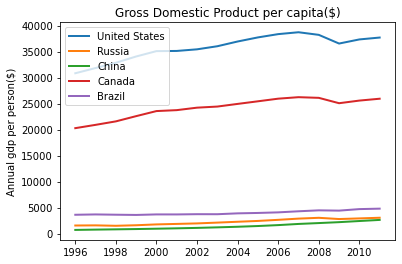

In [271]:
country_gdp_copy = country_gdp_cleaned
gdp_lineg = country_gdp_copy.plot.line(y = ["United States", "Russia", "China", "Canada", "Brazil"], title="Gross Domestic Product per capita($)", linewidth=2.0)
gdp_lineg.set_ylabel('Annual gdp per person($)')

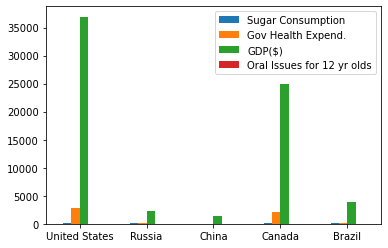

In [371]:
#Sugar Consumption vs Government Health Expenditure vs gdp vs oral health
# sugar_consump_2004_df = pd.DataFrame({"Sugar Consumption(US)": country_SC_copy["United States"],
#                                       "Sugar Consumption(Russia)": country_SC_copy["Russia"],
#                                       "Sugar Consumption(China)": country_SC_copy["China"],
#                                       "Sugar Consumption(Canada)": country_SC_copy["Canada"],
#                                       "Sugar Consumption(Brazil)": country_SC_copy["Brazil"],
#                                     "2001": country_gdp_cleaned["X2001"],
#                                     "2002": country_gdp_cleaned["X2002"],
#                                     "2003": country_gdp_cleaned["X2003"],
#                                     "2004": country_gdp_cleaned["X2004"],
#                                     "2005": country_gdp_cleaned["X2005"],
#                                     "2006": country_gdp_cleaned["X2006"],
#                                     "2007": country_gdp_cleaned["X2007"],
#                                     "2008": country_gdp_cleaned["X2008"],
#                                     "2009": country_gdp_cleaned["X2009"],
#                                     "2010": country_gdp_cleaned["X2010"],
#                                     "2011": country_gdp_cleaned["X2011"]})
sugar_consump_list = [country_SC_copy["United States"]["2004"],
                      country_SC_copy["Russia"]["2004"],
                      country_SC_copy["China"]["2004"],
                      country_SC_copy["Canada"]["2004"],
                      country_SC_copy["Brazil"]["2004"]]

gov_health_list = [country_HE_copy["United States"]["2004"],
                   country_HE_copy["Russia"]["2004"],
                   country_HE_copy["China"]["2004"],
                   country_HE_copy["Canada"]["2004"],
                   country_HE_copy["Brazil"]["2004"]]

gdp_list = [country_gdp_copy["United States"]["2004"],
            country_gdp_copy["Russia"]["2004"],
            country_gdp_copy["China"]["2004"],
            country_gdp_copy["Canada"]["2004"],
            country_gdp_copy["Brazil"]["2004"]]

dental_list = [dental_health_df["United States"]["2004"],
               dental_health_df["Russia"]["2004"],
               dental_health_df["China"]["2004"],
               dental_health_df["Canada"]["2004"],
               dental_health_df["Brazil"]["2004"]]

country_index = ["United States", "Russia", "China", "Canada", "Brazil"]
#test = country_SC_copy["United States"]["2004"]
#test
#sugar_consump_list
#gov_health_list
#gdp_list
#dental_list
total_comparison_df = pd.DataFrame({"Sugar Consumption": sugar_consump_list,
                                    "Gov Health Expend.": gov_health_list,
                                    "GDP($)": gdp_list,
                                    "Oral Issues for 12 yr olds": dental_list}, index=country_index)
ax = total_comparison_df.plot.bar(rot=0)
#total_comparison_lineq = total_comparison_df.plot.line(linewidth=2.0, title="Total Variables Comparison for 2004")
#total_comparison_lineq.set_ylabel('Multiple units')

Text(0, 0.5, 'Annual amount per person($)')

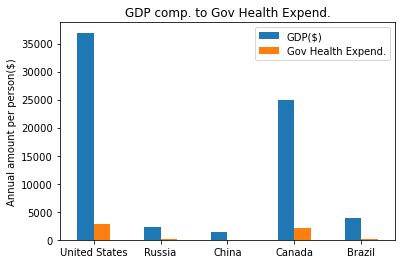

In [308]:
#ax = total_comparison_df.plot.bar(rot=0)

# Bar graph comparing Sugar Consumption and Gov Health Expenditure
GDP_vs_GHE_df = pd.DataFrame({"GDP($)": gdp_list,
                             "Gov Health Expend.": gov_health_list}, index=country_index)
ax = GDP_vs_GHE_df.plot.bar(rot=0, title="GDP comp. to Gov Health Expend.")
ax.set_ylabel('Annual amount per person($)')

r-value is:0.06699302723166087


Text(0, 0.5, 'Annual amount per person($)')

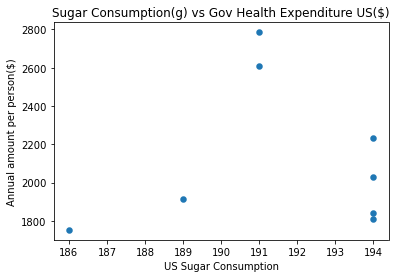

In [409]:
#Sugar consumption vs Health expend

# SC_VS_HE_df = pd.DataFrame({"Sugar Consumption": sugar_consump_list,
#                          "Gov Health Expend.": gov_health_list}, index=country_index)

# SC_VS_HE_df

# SC_VS_HE_lineq = SC_VS_HE_df.plot.line(linewidth=2.0, 
#                                           title="Sugar Consumption vs Gov Health Expenditure")
sugar_consump_list_us = [int(country_SC_copy["United States"]["1996"]), int(country_SC_copy["United States"]["1997"]),
                        int(country_SC_copy["United States"]["1998"]), int(country_SC_copy["United States"]["1999"]),
                        int(country_SC_copy["United States"]["2000"]), int(country_SC_copy["United States"]["2001"]),
                        int(country_SC_copy["United States"]["2003"]), int(country_SC_copy["United States"]["2004"])]

health_expend_list_us = [int(country_HE_copy["United States"]["1996"]), int(country_HE_copy["United States"]["1997"]),
                        int(country_HE_copy["United States"]["1998"]), int(country_HE_copy["United States"]["1999"]),
                        int(country_HE_copy["United States"]["2000"]), int(country_HE_copy["United States"]["2001"]),
                        int(country_HE_copy["United States"]["2003"]), int(country_HE_copy["United States"]["2004"])]

sugar_consump_list_ru = [country_SC_copy["Russia"]["1996"], country_SC_copy["Russia"]["1997"],
                        country_SC_copy["Russia"]["1998"], country_SC_copy["Russia"]["1999"],
                        country_SC_copy["Russia"]["2000"], country_SC_copy["Russia"]["2001"],
                        country_SC_copy["Russia"]["2003"], country_SC_copy["Russia"]["2004"]]

health_expend_list_ru = [country_HE_copy["Russia"]["1996"], country_HE_copy["Russia"]["1997"],
                        country_HE_copy["Russia"]["1998"], country_HE_copy["Russia"]["1999"],
                        country_HE_copy["Russia"]["2000"], country_HE_copy["Russia"]["2001"],
                        country_HE_copy["Russia"]["2003"], country_HE_copy["Russia"]["2004"]]

sugar_consump_list_ch = [country_SC_copy["China"]["1996"], country_SC_copy["China"]["1997"],
                        country_SC_copy["China"]["1998"], country_SC_copy["China"]["1999"],
                        country_SC_copy["China"]["2000"], country_SC_copy["China"]["2001"],
                        country_SC_copy["China"]["2003"], country_SC_copy["China"]["2004"]]

health_expend_list_ch = [country_HE_copy["China"]["1996"], country_HE_copy["China"]["1997"],
                        country_HE_copy["China"]["1998"], country_HE_copy["China"]["1999"],
                        country_HE_copy["China"]["2000"], country_HE_copy["China"]["2001"],
                        country_HE_copy["China"]["2003"], country_HE_copy["China"]["2004"]]

sugar_consump_list_ca = [country_SC_copy["Canada"]["1996"], country_SC_copy["Canada"]["1997"],
                        country_SC_copy["Canada"]["1998"], country_SC_copy["Canada"]["1999"],
                        country_SC_copy["Canada"]["2000"], country_SC_copy["Canada"]["2001"],
                        country_SC_copy["Canada"]["2003"], country_SC_copy["Canada"]["2004"]]

health_expend_list_ca = [country_HE_copy["Canada"]["1996"], country_HE_copy["Canada"]["1997"],
                        country_HE_copy["Canada"]["1998"], country_HE_copy["Canada"]["1999"],
                        country_HE_copy["Canada"]["2000"], country_HE_copy["Canada"]["2001"],
                        country_HE_copy["Canada"]["2003"], country_HE_copy["Canada"]["2004"]]

sugar_consump_list_br = [country_SC_copy["Brazil"]["1996"], country_SC_copy["Brazil"]["1997"],
                        country_SC_copy["Brazil"]["1998"], country_SC_copy["Brazil"]["1999"],
                        country_SC_copy["Brazil"]["2000"], country_SC_copy["Brazil"]["2001"],
                        country_SC_copy["Brazil"]["2003"], country_SC_copy["Brazil"]["2004"]]

health_expend_list_br = [country_HE_copy["Brazil"]["1996"], country_HE_copy["Brazil"]["1997"],
                        country_HE_copy["Brazil"]["1998"], country_HE_copy["Brazil"]["1999"],
                        country_HE_copy["Brazil"]["2000"], country_HE_copy["Brazil"]["2001"],
                        country_HE_copy["Brazil"]["2003"], country_HE_copy["Brazil"]["2004"]]

# "RU Sugar Consumption": sugar_consump_list,
#                             "RU Gov Health Expend.": gov_health_list,
#                             "CH Sugar Consumption": sugar_consump_list,
#                             "CH Gov Health Expend.": gov_health_list,
#                             "CA Sugar Consumption": sugar_consump_list,
#                             "CA Gov Health Expend.": gov_health_list,
#                             "BR Sugar Consumption": sugar_consump_list,
#                             "BR Gov Health Expend.": gov_health_list
SC_VS_HE_df = pd.DataFrame({"US Sugar Consumption": sugar_consump_list_us,
                            "US Gov Health Expend.": health_expend_list_us,
                            "RU Sugar Consumption": sugar_consump_list_ru,
                            "RU Gov Health Expend.": health_expend_list_ru,
                            "CH Sugar Consumption": sugar_consump_list_ch,
                            "CH Gov Health Expend.": health_expend_list_ch,
                            "CA Sugar Consumption": sugar_consump_list_ca,
                            "CA Gov Health Expend.": health_expend_list_ca,
                            "BR Sugar Consumption": sugar_consump_list_br,
                            "BR Gov Health Expend.": health_expend_list_br})
SC_VS_HE_df
# SC_VS_HE_lineq = SC_VS_HE_df.plot.line(linewidth=2.0, y = ["US Sugar Consumption", "RU Sugar Consumption", 
#                                                            "CH Sugar Consumption", "CA Sugar Consumption",
#                                                            "BR Sugar Consumption"], 
#                                                       x = ["US Gov Health Expend.", "RU Gov Health Expend.",
#                                                            "CH Gov Health Expend.", "CA Gov Health Expend.",
#                                                            "BR Gov Health Expend."], 
#                                           title="Sugar Consumption vs Gov Health Expenditure")

#slope, candy_int, r, p, std_err = st.linregress(sugar_consump_list_us, health_expend_list_us)

#us_data_line = slope * sugar_consump_list_us + candy_int

# SC_VS_HE_us_lineeq = SC_VS_HE_df.plot.scatter(linewidth=2.0, x = "US Sugar Consumption",
#                                                       y = "US Gov Health Expend.", 
#                                           title="Sugar Consumption(g) vs Gov Health Expenditure US($)")
#plt.plot(sugar_consump_list_us, us_data_line)
#trend = regression.predict(beta=regression.beta)
# Perform a linear regression on sugar and wins
slope, candy_int, r, p, std_err = st.linregress(sugar_consump_list_us, health_expend_list_us)
print("r-value is:"+str(r))
SC_VS_HE_us_lineeq = SC_VS_HE_df.plot.scatter(linewidth=2.0, x = "US Sugar Consumption",y = "US Gov Health Expend.", title="Sugar Consumption(g) vs Gov Health Expenditure US($)")
SC_VS_HE_us_lineeq.set_ylabel('Annual amount per person($)')



r-value is:-0.14003526172766617


Text(0, 0.5, 'Annual amount per person($)')

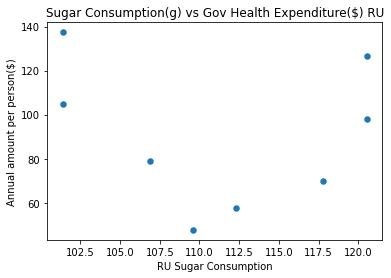

In [415]:
slope, candy_int, r, p, std_err = st.linregress(sugar_consump_list_ru, health_expend_list_ru)
print("r-value is:"+str(r))
SC_VS_HE_ru_lineeq = SC_VS_HE_df.plot.scatter(linewidth=2.0, x = "RU Sugar Consumption",
                                                      y = "RU Gov Health Expend.", 
                                          title="Sugar Consumption(g) vs Gov Health Expenditure($) RU")
SC_VS_HE_ru_lineeq.set_ylabel('Annual amount per person($)')

r-value is:0.01346036350485458


Text(0, 0.5, 'Annual amount per person($)')

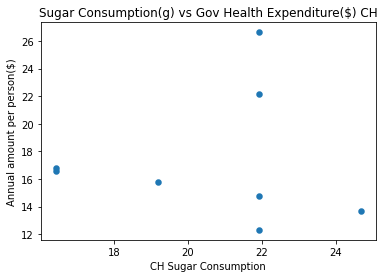

In [411]:
slope, candy_int, r, p, std_err = st.linregress(sugar_consump_list_ch, health_expend_list_ch)
print("r-value is:"+str(r))
SC_VS_HE_ch_lineeq = SC_VS_HE_df.plot.scatter(linewidth=2.0, x = "CH Sugar Consumption",
                                                      y = "CH Gov Health Expend.", 
                                          title="Sugar Consumption(g) vs Gov Health Expenditure($) CH")
SC_VS_HE_ch_lineeq.set_ylabel('Annual amount per person($)')

r-value is:0.9570453744693612


Text(0, 0.5, 'Annual amount per person($)')

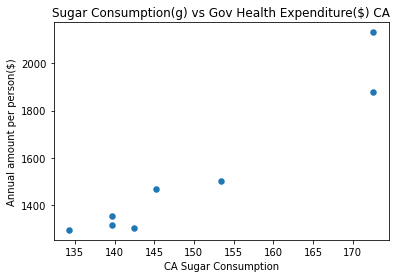

In [412]:
slope, candy_int, r, p, std_err = st.linregress(sugar_consump_list_ca, health_expend_list_ca)
print("r-value is:"+str(r))
SC_VS_HE_ca_lineeq = SC_VS_HE_df.plot.scatter(linewidth=2.0, x = "CA Sugar Consumption",
                                                      y = "CA Gov Health Expend.", 
                                          title="Sugar Consumption(g) vs Gov Health Expenditure($) CA")
SC_VS_HE_ca_lineeq.set_ylabel('Annual amount per person($)')

r-value is:0.3837215785306806


Text(0, 0.5, 'Annual amount per person($)')

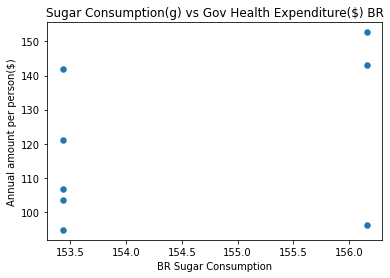

In [413]:
slope, candy_int, r, p, std_err = st.linregress(sugar_consump_list_br, health_expend_list_br)
print("r-value is:"+str(r))
SC_VS_HE_br_lineeq = SC_VS_HE_df.plot.scatter(linewidth=2.0, x = "BR Sugar Consumption",
                                                      y = "BR Gov Health Expend.", 
                                          title="Sugar Consumption(g) vs Gov Health Expenditure($) BR")
SC_VS_HE_br_lineeq.set_ylabel('Annual amount per person($)')